![](https://img.kaikeba.com/70350130700202jusm.png)

# AI核心课作业3-1-实现一个三层神经网络

## 准备工作
导入本次项目要用到的库：<br>

In [1]:
# 基础运算库
import numpy as np
# 深度学习库
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torch.nn.functional as F
import torchvision.transforms as transforms
# 辅助绘图库
import matplotlib.pyplot as plt
# 时间操作库
import time
# 进度条控制库
from tqdm import tqdm

# 项目1：简单神经网络的前向传播

## 问题1：定义初始参数及激活函数（15分）

&emsp;&emsp;你需要使用numpy实现神经网络的前向传播过程，并算出输出层的最终输出结果。<br>
**为了完成上述任务我们需要进行如下假设：**<br>
1. 输入的值为\[3,5\]<br>
1. 隐藏层h1的两个权重为\[2,4\]、\[4,-5\]<br>
1. 隐藏层h2的两个权重为\[-1,1\]、\[2,2\]<br>
1. 输出层的权重为\[-3,7\]<br>
1. 所有层不使用偏置<br>
1. 所有隐藏层需添加tanh激活函数<br>

<font color=red>请定义一个numpy数组，内容为神经网络的输入数据</font><br>

In [29]:
######## your code ########  
X = np.array([3, 5])
######## your code ########

<font color=red>请定义一个numpy数组，内容为神经网络的隐藏层及输出层权重</font><br>
Tips：权重字典已经建好，你只需要按照隐藏层名称填入对应的值即可。

In [30]:
######## your code ########
weights = {'h11': np.array([2, 4]),
           'h12': np.array([4, -5]),
           'h21': np.array([-1, 1]),
           'h22': np.array([2, 2]),
           'out': np.array([-3, 7])}
######## your code ########

<font color=red>请完善tanh激活函数</font><br>

In [31]:
######## your code ########
def tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
######## your code ########

## 问题2：逐层计算神经网络输出（30分）

&emsp;&emsp;在神经网络的计算中，需要先将需计算层的权重与其输入数据相乘，而后求和，继而通过激活函数的运算，就可以输出到下一层了。<br>
**下面我们将以层为单位，进行运算：**<br>
1. 首先是第一个隐藏层，你需要将输入层的数据与隐藏层的权重相乘、求和、并输入到激活函数中。<br>

<font color=red>补全下列代码，将输入层的数据与第一隐藏层的权重相乘、求和、并输入到激活函数中。</font><br>

In [43]:
######## your code ########
hidden_11_value = tanh((X * weights['h11']).sum())
hidden_12_value = tanh((X * weights['h12']).sum())
######## your code ########

hidden_1_output = np.array([hidden_11_value, hidden_12_value])

2. 接下来是第二个隐藏层，这一层的操作与上一层完全相同。<br>

<font color=red>请补全下列代码，将上层输出的数据与第二隐藏层的权重相乘、求和、并输入到激活函数中。</font><br>

In [44]:
######## your code ########
hidden_21_value = tanh((hidden_1_output * weights['h21']).sum())
hidden_22_value = tanh((hidden_1_output * weights['h22']).sum())
######## your code ########

hidden_2_output = np.array([hidden_21_value, hidden_22_value])

3. 最后是输出层，此时只有一个节点需要运算，且无需添加激活函数。<br>

<font color=red>请补全下列代码，将上层输出的数据与输出层的权重相乘、求和。</font><br>

In [45]:
######## your code ########
output = ((hidden_2_output * weights['out']).sum())
######## your code ########

4. 至此，你已经完成了全部运算，下面将这几层的输出打印出来看看吧。<br>
*注：output应为9.887385002294863*<br>

In [46]:
print(output)

2.8920827403683393


# 项目2：CIFAR-10图像分类

## 前置准备

&emsp;&emsp;本项目使用的数据集可以从torchvision库中直接导出，下面是一些基础数据操作（数据下载可能需要几分钟，请耐心等待）。<br>

In [2]:
##定义对图像的各种变换操作，包括把array转换为tensor，对图像做正则化
#transforms.Compose主要是用于常见的一些图形变换，例如裁剪、旋转
#遍历list数组，对img依次执行每个transforms操作
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.4914, 0.48216, 0.44653),
                                                     (0.24703, 0.24349, 0.26159))])
#导出torchvision里的CIFAR10数据集，root是把数据下载之后存放的目录，train控制是不是在训练阶段，download控制是不是需要下载，transform把一系列的图像变换传入进来。
trainset = torchvision.datasets.CIFAR10(root='/data/course_data/AI/AI_homework_6/',
                                        train=True, 
                                        download=True, 
                                        transform=transform)
testset = torchvision.datasets.CIFAR10(root='/data/course_data/AI/AI_homework_6/',
                                       train=False, 
                                       download=True, 
                                       transform=transform)
#用来把训练数据分成多个小组，此函数每次抛出一组数据。
trainloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size=16,
                                          shuffle=True)
#用来把测试数据分成多个小组，此函数每次抛出一组数据。
testloader = torch.utils.data.DataLoader(testset, 
                                         batch_size=16, 
                                         shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


&emsp;&emsp;数据下载完成后，我们就可以简单查看数据label，看看是否和练习说明中的数据集介绍对的上。<br>

In [3]:
trainset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

&emsp;&emsp;下面我们再来检查一下数据图像。<br>

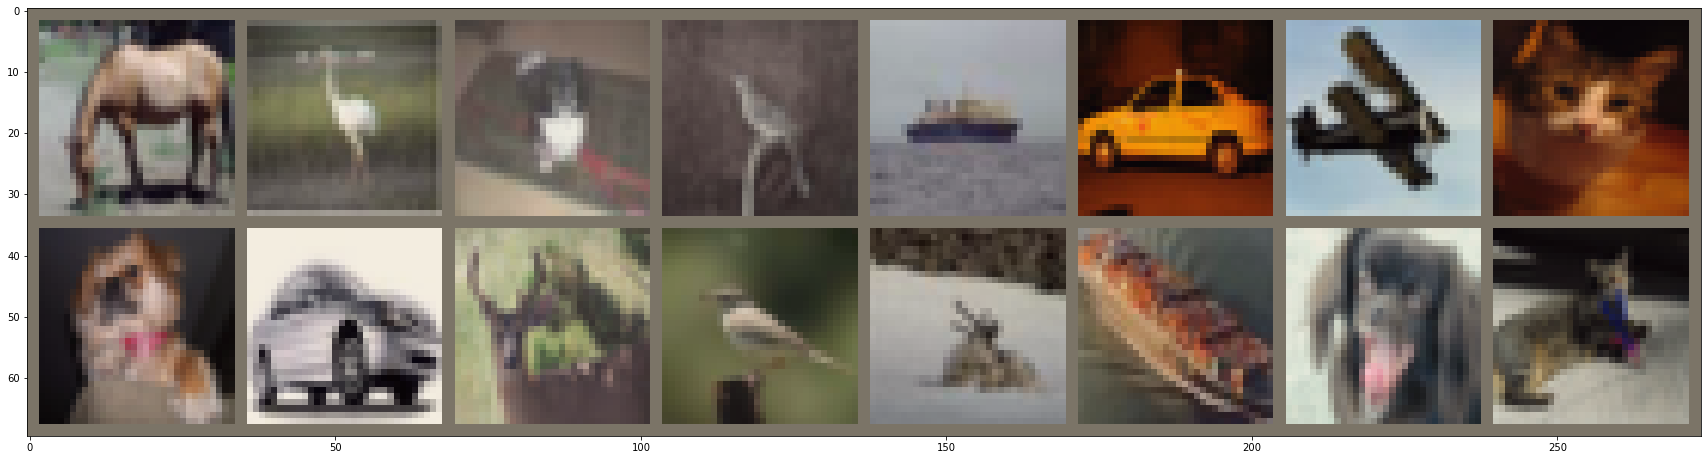

In [4]:
#把图片进行可视化展示
#定义画图的函数
def imshow(inp, title=None):
    """Imshow for Tensor."""
    #定义画图的画布
    fig = plt.figure(figsize=(30, 30))
    #转换图片的纬度
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    #对图片进行标准化
    inp = std * inp + mean
    #整个图片数组的值限制在指定值a_min,与a_max之间
    inp = np.clip(inp, 0, 1)
    #对图片进行可视化展示
    plt.imshow(inp, )

# 获取一个batch的数据
inputs, classes = next(iter(trainloader))

# 以网格的格式展示，作用是将若干幅图像拼成一幅图像
out = torchvision.utils.make_grid(inputs)
# plt.imshow()就可显示图片同时也显示其格式。
imshow(out, title=[trainset.classes[x] for x in classes])

## 问题1：搭建简单神经网络（20分）
&emsp;&emsp;数据准备就绪后，就需要你来搭建一个简单神经网络。<br>
&emsp;&emsp;<font color=red>请补全下列代码，定义一个3层全连接神经网络，输入维度是32*32*3，第一层输出维度是1000，第二层输出维度是500，第三层输出维度是10。</font><br>

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        ######## your code ########
        self.fc1 = nn.Linear(3072 ,1000 )
        self.fc2 = nn.Linear(1000 , 500)
        self.fc3 = nn.Linear(500 , 10)
        ######## your code ########
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)
#实例话神经网络的类
net = Net()

&emsp;&emsp;在定义好模型结构之后，还需确定损失函数及优化器。<br>

In [6]:
# 定义损失函数-交叉熵
criterion = nn.CrossEntropyLoss()
# 定义优化器，将神经网络的参数都传入优化器，并定义学习率
optimizer = optim.Adam(net.parameters(), lr=3e-4)

## 问题2：神经网络的训练（25分）

&emsp;&emsp;模型主要内容都已完成，下面就可以进行训练了。在模型训练过程中，一般遵循如下步骤：<br>
1. 大for循环-epochs，用于管理一套数据循环训练几遍<br>
1. 小for循环-step，用于以batchsize为单位，从dataloader中调取数据<br>
1. 清空优化器的梯度<br>
1. 读入data和label，并进行形状变换（可做可不做）<br>
1. 运行模型前向传播过程<br>
1. 基于模型输出生成最终结果<br>
1. 计算损失<br>
1. 基于损失计算梯度<br>
1. 基于梯度更新参数<br>

&emsp;&emsp;<font color=red>请补全代码，训练模型。（相关代码已经提供在练习指导中，你需要根据模型训练步骤，将代码段逐一填入下列代码中）*</font><br>

In [7]:
num_epochs = 10
since = time.time()
net.train()
for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch + 1, num_epochs))
    
    running_loss = 0.0
    running_corrects = 0
    # 从trainloader里循环取出每一批次数据，
    for data in tqdm(trainloader):

        ######## your code ########
        optimizer.zero_grad() # 用于清空优化器梯度
        inputs, labels = data # 用于读入data和label
        inputs = inputs.view(-1, 32 * 32 * 3) # 用于对输入进行形状变换
        outputs = net(inputs) # 用于模型前向传播
        _, preds = torch.max(outputs, 1) # 用于生成最终输出结果
        loss = criterion(outputs, labels) # 用于计算损失
        loss.backward() # 用于计算梯度
        optimizer.step() # 用于参数更新
        ######## your code ########

        # 一个批次数据的损失函数的计算
        running_loss += loss.item() * inputs.size(0)
        # 一个批次数据准确率的计算
        running_corrects += torch.sum(preds == labels.data)
    
    epoch_loss = running_loss / trainloader.dataset.data.shape[0]
    epoch_acc = running_corrects.double() / trainloader.dataset.data.shape[0]
    
    print('train Loss: {:.4f} Acc: {:.4f}'.format(
        epoch_loss, epoch_acc))
    print('-' * 10)
    
time_elapsed = time.time() - since
print('Training complete in {:.0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))

  0%|          | 6/3125 [00:00<01:24, 37.00it/s]

Epoch 1/10


  0%|          | 3/3125 [00:00<02:05, 24.91it/s]

train Loss: 1.6351 Acc: 0.4192
----------
Epoch 2/10


  0%|          | 3/3125 [00:00<02:48, 18.50it/s]

train Loss: 1.4254 Acc: 0.4980
----------
Epoch 3/10


  0%|          | 3/3125 [00:00<01:46, 29.27it/s]

train Loss: 1.3075 Acc: 0.5381
----------
Epoch 4/10


  0%|          | 3/3125 [00:00<02:49, 18.42it/s]

train Loss: 1.2067 Acc: 0.5704
----------
Epoch 5/10


  0%|          | 4/3125 [00:00<01:28, 35.46it/s]

train Loss: 1.1125 Acc: 0.6063
----------
Epoch 6/10


  0%|          | 3/3125 [00:00<01:59, 26.16it/s]

train Loss: 1.0241 Acc: 0.6353
----------
Epoch 7/10


  0%|          | 4/3125 [00:00<01:31, 34.16it/s]

train Loss: 0.9336 Acc: 0.6667
----------
Epoch 8/10


  0%|          | 4/3125 [00:00<02:02, 25.44it/s]

train Loss: 0.8448 Acc: 0.6992
----------
Epoch 9/10


  0%|          | 3/3125 [00:00<02:03, 25.29it/s]

train Loss: 0.7768 Acc: 0.7242
----------
Epoch 10/10


100%|██████████| 3125/3125 [01:57<00:00, 26.67it/s]

train Loss: 0.7013 Acc: 0.7527
----------
Training complete in 19m 15s


## 问题3：模型测评（10分）

&emsp;&emsp;完成模型训练后，还需对模型进行测评，验证模型在测试集上的精度。<br>
Tips：在模型训练日志中，也有打印精确度acc，但这是模型在训练集上的精度，而不是测试集上的精度哦。你可以观察观察训练集精度与测试集精度，看看有没有什么差异。<br>
&emsp;&emsp;<font color=red>请补全下列代码，完成模型测评</font><br>

In [8]:
# TODO： 补全下列代码，完成模型测评
correct, total = 0, 0
net.eval()
for data in tqdm(testloader):
    
    ######## your code ########
    inputs, labels = data
    inputs = inputs.view(-1, 32 * 32 * 3)
    outputs = net(inputs)
    ######## your code ########
    
    _, predicted = torch.max(outputs, 1) 
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print('The testing set accuracy of the network is: %d %%' % (100 * correct / total))

100%|██████████| 625/625 [00:07<00:00, 85.63it/s] 

The testing set accuracy of the network is: 53 %
